In [2]:
import os
import re
import numpy as np
import pandas as pd

In [3]:
dirname = 'dust_data/'

In [4]:
filenames = os.listdir(dirname)
full_df = []
columns = ['date', 'time', 'city', 'gu', 'road', 'start', 'end', 'temperature', 'humidity', 'avg_re_dust', 'dust_ratio']
for k, filename in enumerate(filenames):
    full_filename = os.path.join(dirname, filename)
    df = pd.read_csv(full_filename, encoding='cp949')
    df.columns = columns
    if len(df['date'][0]) != 10:
        year = re.search(r"\d{4}", filename).group()
        df['date'] = df['date'].apply(lambda x: year+'-'+x)
    if k == 0:
        full_df = df
    else:
        full_df = pd.concat([full_df, df], axis=0)

In [5]:
full_df

,date,time,city,gu,road,start,end,temperature,humidity,avg_re_dust,dust_ratio
0,2018-05-03,09:50:00,서울,강서구,개화동로,서울특별시 강서구 개화동 659천,서울특별시 강서구 방화동 886-15 도,15.0,46.0,5.0,매우좋음
1,2018-05-03,10:13:00,서울,강서구,공항대로,서울특별시 강서구 방화동 621-4도,서울특별시 양천구 목동 560도,15.0,45.0,20.0,매우좋음
2,2018-05-03,10:41:00,서울,강서구,양천로,서울특별시 강서구 염창동 259-8제,서울특별시 강서구 방화동 515-4도,15.0,47.0,39.0,매우좋음
3,2018-05-03,10:46:00,서울,강서구,초원로,서울특별시 강서구 방화동 651-1도,서울특별시 강서구 방화동 217-156 도,15.0,48.0,13.0,매우좋음
4,2018-05-03,10:50:00,서울,강서구,마곡중앙5로,서울특별시 강서구 방화동 217-156 도,서울특별시 강서구 마곡동 278-6답,15.0,48.0,25.0,매우좋음
...,...,...,...,...,...,...,...,...,...,...,...
882,2018-06-29,12:30:00,인천,남구,인주대로,인천광역시 남구 주안동 1484도,인천광역시 남구 숭의동 440-16 철,26.0,68.0,40.0,매우좋음
883,2018-06-29,12:42:00,인천,남구,석정로,인천광역시 남구 숭의동 162-14도,인천광역시 남구 주안동 40-4도,26.0,65.0,40.0,매우좋음
884,2018-06-29,12:59:00,인천,남구,경원대로,인천광역시 남구 주안동 40-4도,인천광역시 남구 문학동 23-3 도,28.0,60.0,8.0,매우좋음
885,2018-06-29,13:52:00,인천,남구,미추홀대로,인천광역시 남구 학익동 82-18 임,인천광역시 남구 주안동 234도,28.0,58.0,38.0,매우좋음


In [6]:
seoul_df = full_df[full_df['city']=='서울']

In [7]:
seoul_df.groupby('gu')['avg_re_dust'].mean()

gu
강남구     35.473418
강동구     96.344988
강북구     34.023333
강서구     60.233712
관악구     47.590551
광진구     33.611979
구로구     28.656954
금천구     50.970588
노원구     35.345083
도봉구     29.776358
동대문구    18.186047
동작구     33.997333
마포구     42.082111
서대문구    39.446746
서초구     29.575604
성동구     28.103641
성북구     32.197349
송파구     56.298682
양천구     27.049872
영등포구    39.894240
용산구     26.659722
은평구     47.551601
종로구     32.155116
중구      18.954327
중랑구     29.549632
Name: avg_re_dust, dtype: float64

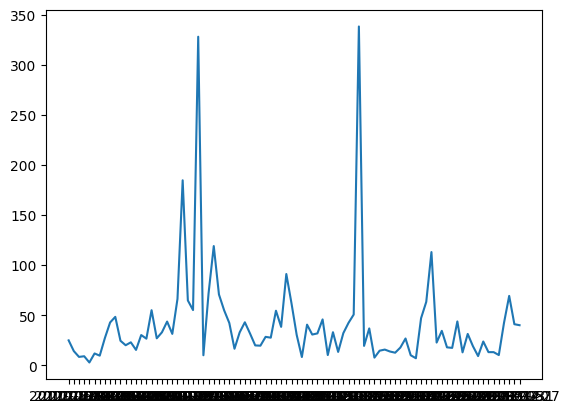

In [8]:
import matplotlib.pyplot as plt

plt.plot(seoul_df[seoul_df['gu']=='강남구'].groupby('date')['avg_re_dust'].mean())

In [9]:
seoul_df.to_csv('seoul.csv')